![snap](https://lever-client-logos.s3.amazonaws.com/2bd4cdf9-37f2-497f-9096-c2793296a75f-1568844229943.png)

# GetAround 

[GetAround](https://www.getaround.com/?wpsrc=Google+Organic+Search) is the Airbnb for cars. You can rent cars from any person for a few hours to a few days! Founded in 2009, this company has known rapid growth. In 2019, they count over 5 million users and about 20K available cars worldwide. 

As Jedha's partner, they offered this great challenges: 

## Context 

When renting a car, our users have to complete a checkin flow at the beginning of the rental and a checkout flow at the end of the rental in order to:

* Assess the state of the car and notify other parties of pre-existing damages or damages that occurred during the rental.
* Compare fuel levels.
* Measure how many kilometers were driven.

The checkin and checkout of our rentals can be done with three distinct flows:
* **📱 Mobile** rental agreement on native apps: driver and owner meet and both sign the rental agreement on the owner’s smartphone
* **Connect:** the driver doesn’t meet the owner and opens the car with his smartphone
* **📝 Paper** contract (negligible)

## Project 🚧

For this case study, we suggest that you put yourselves in our shoes, and run an analysis we made back in 2017 🔮 🪄

When using Getaround, drivers book cars for a specific time period, from an hour to a few days long. They are supposed to bring back the car on time, but it happens from time to time that drivers are late for the checkout.

Late returns at checkout can generate high friction for the next driver if the car was supposed to be rented again on the same day : Customer service often reports users unsatisfied because they had to wait for the car to come back from the previous rental or users that even had to cancel their rental because the car wasn’t returned on time.


## Goals 🎯

In order to mitigate those issues we’ve decided to implement a minimum delay between two rentals. A car won’t be displayed in the search results if the requested checkin or checkout times are too close from an already booked rental.

It solves the late checkout issue but also potentially hurts Getaround/owners revenues: we need to find the right trade off.

**Our Product Manager still needs to decide:**
* **threshold:** how long should the minimum delay be?
* **scope:** should we enable the feature for all cars?, only Connect cars?

In order to help them make the right decision, they are asking you for some data insights. Here are the first analyses they could think of, to kickstart the discussion. Don’t hesitate to perform additional analysis that you find relevant.

* Which share of our owner’s revenue would potentially be affected by the feature?
* How many rentals would be affected by the feature depending on the threshold and scope we choose?
* How often are drivers late for the next check-in? How does it impact the next driver?
* How many problematic cases will it solve depending on the chosen threshold and scope?

### Web dashboard

First build a dashboard that will help the product Management team with the above questions. You can use `streamlit` or any other technology that you see fit. 


### Machine Learning - `/predict` endpoint

In addition to the above question, the Data Science team is working on *pricing optimization*. They have gathered some data to suggest optimum prices for car owners using Machine Learning. 

You should provide at least **one endpoint** `/predict`. The full URL would look like something like this: `https://your-url.com/predict`.

This endpoint accepts **POST method** with JSON input data and it should return the predictions. We assume **inputs will be always well formatted**. It means you do not have to manage errors. We leave the error handling as a bonus.

Input example:

```
{
  "input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8], [7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]
}
```

The response should be a JSON with one key `prediction` corresponding to the prediction.

Response example:

```
{
  "prediction":[6,6]
}
```

### Documentation page

You need to provide the users with a **documentation** about your API.

It has to be located at the `/docs` of your website. If we take the URL example above, it should be located directly at `https://your-url.com/docs`).

This small documentation should at least include:
- An h1 title: the title is up to you.
- A description of every endpoints the user can call with the endpoint name, the HTTP method, the required input and the expected output (you can give example).

You are free to add other any other relevant informations and style your HTML as you wish.

### Online production

You have to **host your API online**. We recommend you to use [Heroku](https://www.heroku.com/) as it is free of charge. But you are free to choose any other hosting provider.

## Helpers 🦮

To help you start with this project we provide you with some pieces of advice:

* Spend some time understanding data 
* Don't overlook Data Analysis part, there is a lot of insights to find out. 
* Data Analysis should take 2 to 5 hours 
* Machine Learning should take 3 to 6 hours 
* You are not obligated to use libraries to handle your Machine Learning workflow like `mlflow` but we definitely advise you to do so.


### Share your code

In order to get evaluation, do not forget to share your code on a [Github](https://github.com/) repository. You can create a [`README.md`](https://guides.github.com/features/mastering-markdown/) file with a quick description about this project, how to setup locally and the online URL.

## Deliverable 📬

To complete this project, you should deliver:

- A **dashboard** in production (accessible via a web page for example)
- The **whole code** stored in a **Github repository**. You will include the repository's URL.
- An **documented online API** on Heroku server (or any other provider you choose) containing at least **one `/predict` endpoint** that respects the technical description above. We should be able to request the API endpoint `/predict` using `curl`:

```shell
$ curl -i -H "Content-Type: application/json" -X POST -d '{"input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]}' http://your-url/predict
```

Or Python:

```python
import requests

response = requests.post("https://your-url/predict", json={
    "input": [[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]]
})
print(response.json())
```

## Data 

There are two files you need to download: 

* [Delay Analysis](https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx) 👈 Data Analysis 
* [Pricing Optimization](https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv) 👈 Machine Learning 


Happy coding! 👩‍💻

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import math

df_delay = pd.read_excel("get_around_delay_analysis.xlsx")
df_price = pd.read_csv("get_around_pricing_project.csv")

# Exploratory Data Analysis in pricing

In [2]:
df_price

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


count    4.843000e+03
mean     1.409628e+05
std      6.019674e+04
min     -6.400000e+01
25%      1.029135e+05
50%      1.410800e+05
75%      1.751955e+05
max      1.000376e+06
Name: mileage, dtype: float64
count    4843.00000
mean      128.98823
std        38.99336
min         0.00000
25%       100.00000
50%       120.00000
75%       135.00000
max       423.00000
Name: engine_power, dtype: float64
count    4843.000000
mean      121.214536
std        33.568268
min        10.000000
25%       104.000000
50%       119.000000
75%       136.000000
max       422.000000
Name: rental_price_per_day, dtype: float64


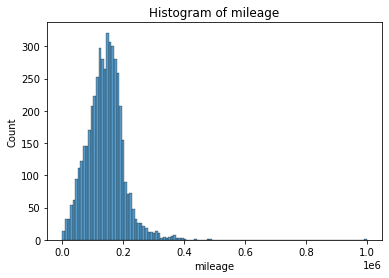

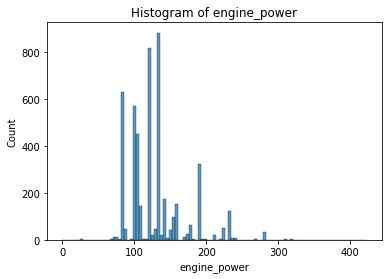

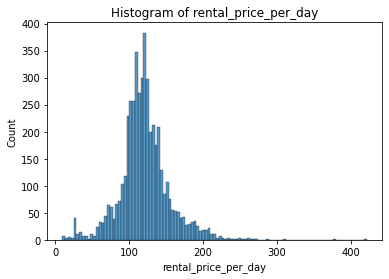

In [3]:
cols_cat  = ['model_key',  'fuel', 'paint_color',
            'car_type', 'private_parking_available', 'has_gps',
            'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
            'has_speed_regulator', 'winter_tires']
cols_num = ['mileage', 'engine_power','rental_price_per_day']

for i in cols_num:
    print(df_price[i].describe())

for i in cols_num:
    sns.histplot(df_price, x=i)
    plt.title(f'Histogram of {i}')
    plt.show()

count        4843
unique         28
top       Citroën
freq          969
Name: model_key, dtype: object
count       4843
unique         4
top       diesel
freq        4641
Name: fuel, dtype: object
count      4843
unique       10
top       black
freq       1633
Name: paint_color, dtype: object
count       4843
unique         8
top       estate
freq        1606
Name: car_type, dtype: object
count     4843
unique       2
top       True
freq      2662
Name: private_parking_available, dtype: object
count     4843
unique       2
top       True
freq      3839
Name: has_gps, dtype: object
count      4843
unique        2
top       False
freq       3865
Name: has_air_conditioning, dtype: object
count      4843
unique        2
top       False
freq       3881
Name: automatic_car, dtype: object
count      4843
unique        2
top       False
freq       2613
Name: has_getaround_connect, dtype: object
count      4843
unique        2
top       False
freq       3674
Name: has_speed_regulator, dtype: ob

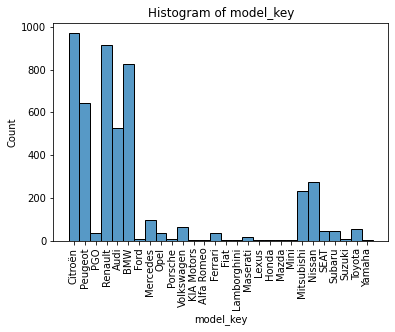

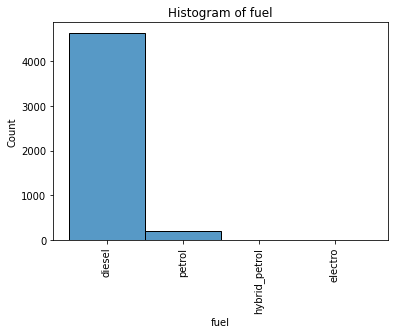

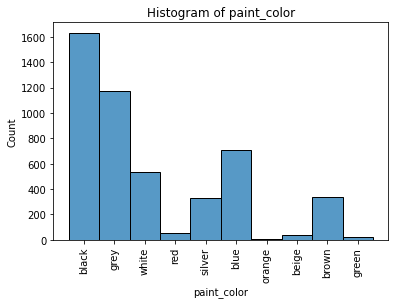

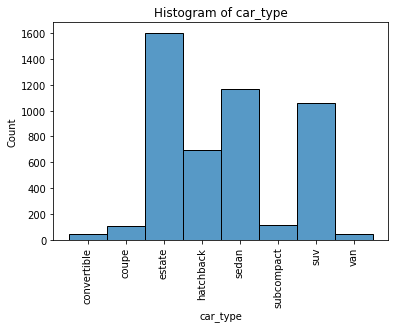

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


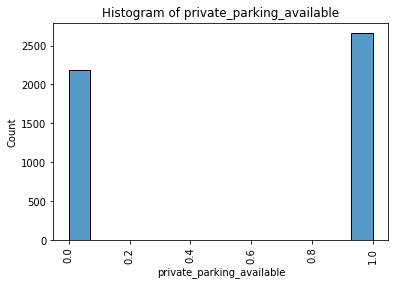

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


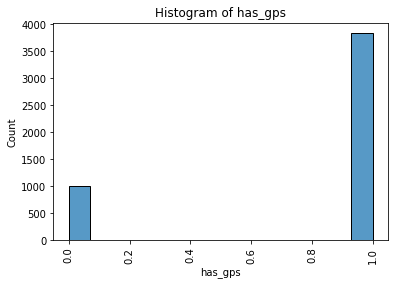

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


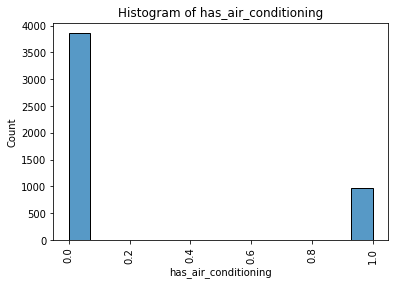

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


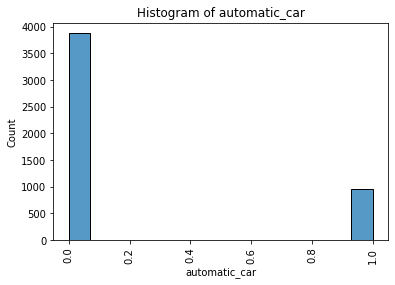

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


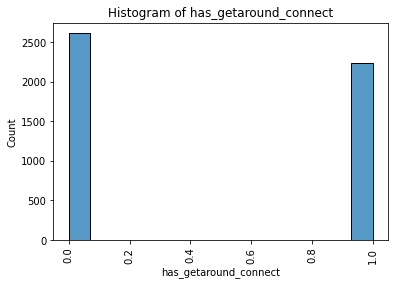

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


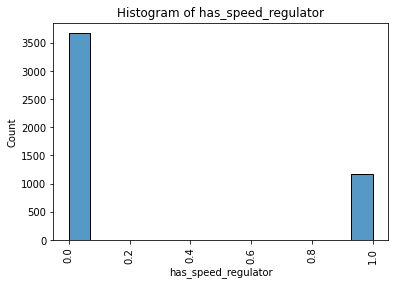

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


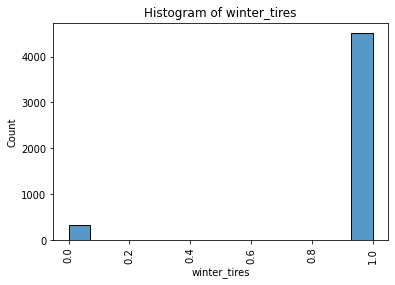

In [4]:
cols_cat  = ['model_key',  'fuel', 'paint_color',
            'car_type', 'private_parking_available', 'has_gps',
            'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
            'has_speed_regulator', 'winter_tires']

for i in cols_cat:
    print(df_price[i].describe())

for i in cols_cat:
    sns.histplot(df_price, x=i)
    plt.title(f'Histogram of {i}')
    plt.xticks(rotation=90)
    plt.show()

In [5]:
print(df_price.info())
df_price.isnull().sum() #There is no missing valuesin the df_price dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

Unnamed: 0                   0
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [6]:
def other (x,list_):
    y = x 
    if x in list_:
        y= 'others'
    return y

#preparing labels that will be replaced as other
list_model_other = ['Maserati', 'Suzuki', 'Porsche', 'Ford', 
                    'KIA Motors', 'Alfa Romeo', 'Fiat', 
                    'Lexus', 'Lamborghini', 'Mini', 'Mazda',
                    'Honda','Yamaha']

list_fuel_other = ['hybrid_petrol', 'electro']
list_color_other = ['green','orange']

df_price['model_key_'] = df_price['model_key'].apply(lambda x: other(x,list_model_other))
df_price['fuel_'] =  df_price['fuel'].apply(lambda x: other(x,list_fuel_other))
df_price['paint_color_'] =  df_price['paint_color'].apply(lambda x: other(x,list_color_other))

In [7]:
mask1 = df_price.mileage > df_price.mileage.quantile(0.01)
mask2 = df_price.mileage < df_price.mileage.quantile(0.99)
mask3 = df_price.rental_price_per_day > df_price.rental_price_per_day.quantile(0.01)
mask4 = df_price.rental_price_per_day < df_price.rental_price_per_day.quantile(0.99)
print('Taking central 98% data of numerical columns\n')
dataset2= df_price[mask1 & mask2 & mask3 & mask4]
print('Done\n')
print('\nShape of new dataset:', df_price.shape)
print('\nAmount of data trimmed from first dataset: ', df_price.shape[0] - df_price.shape[0])

Taking central 98% data of numerical columns

Done


Shape of new dataset: (4843, 18)

Amount of data trimmed from first dataset:  0


# Exploratory Data Analysis in delays

In [8]:
df_delay.columns

Index(['rental_id', 'car_id', 'checkin_type', 'state',
       'delay_at_checkout_in_minutes', 'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

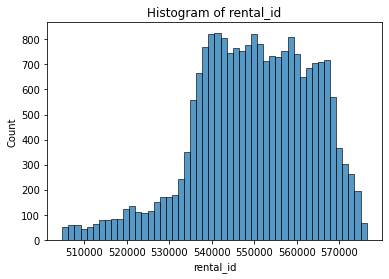

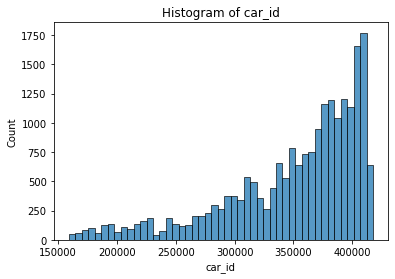

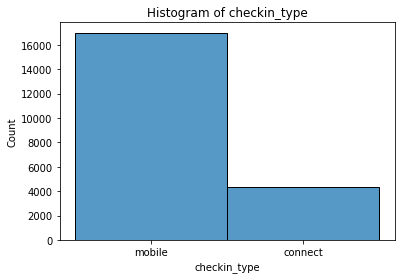

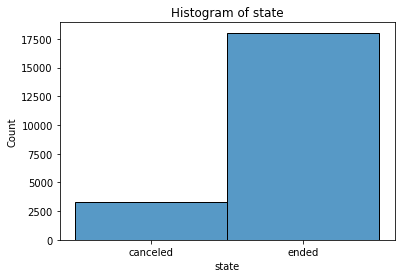

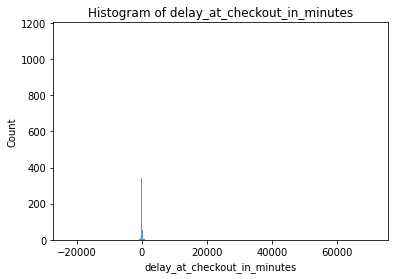

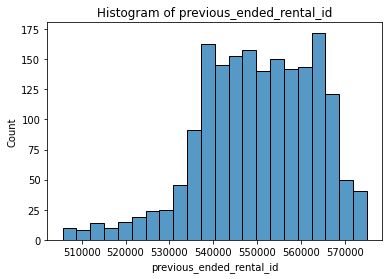

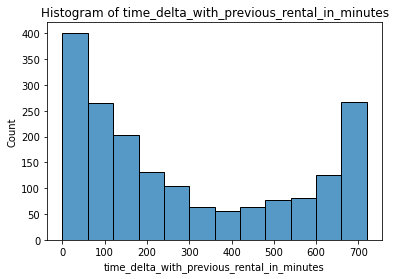

In [9]:
columns = ['rental_id', 'car_id', 'checkin_type', 'state','delay_at_checkout_in_minutes', 
           'previous_ended_rental_id','time_delta_with_previous_rental_in_minutes']

for column in columns:
    sns.histplot(data=df_delay[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.show()

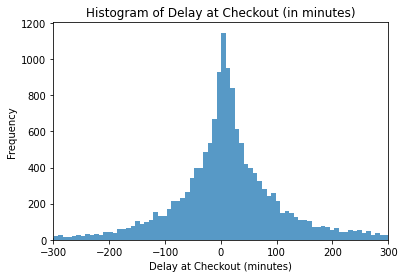

In [10]:
sns.histplot(data=df_delay["delay_at_checkout_in_minutes"])
plt.xlim(-300, 300)  
plt.title('Histogram of Delay at Checkout (in minutes)')
plt.xlabel('Delay at Checkout (minutes)')
plt.ylabel('Frequency')
plt.show()

In [11]:
def get_previous_rental_delay(row, dataframe):
    delay = np.nan
    previous_rental_id = row['previous_ended_rental_id']
    if not np.isnan(previous_rental_id):
        previous_rental = dataframe[dataframe['rental_id'] == previous_rental_id]
        if not previous_rental.empty:
            delay = previous_rental['delay_at_checkout_in_minutes'].values[0]
    return delay

def get_impact_of_previous_rental_delay(row):
    impact = 'No previous rental info'
    if not math.isnan(row['checkin_delay_in_minutes']):
        if row['checkin_delay_in_minutes'] > 0:
            if row['state'] == 'Canceled':
                impact = 'Cancelation'
            else:
                impact = 'Late checkin'
        else:
            impact = 'No impact'
    return impact

def delay_function(x):
    y = 'Unknown'  
    if x < 0 :
        y = 'No delay'
    elif x< 5:
        y = 'Delay between <5 mins'
    elif 5<x < 10 : 
        y = 'Delay between 5-10 mins'
    elif 10<x < 60 :
        y = 'Delay between 10-60 mins'
    elif x >= 60 :
        y = 'Delay ≥ 60'
    elif x >= 1440:
        y ='Delay of 1 day'
    return y

In [12]:
df_delay['previous_rental_checkout_delay_in_minutes'] = df_delay.apply(get_previous_rental_delay, args = [df_delay], axis = 1) # add 'previous_rental_checkout_delay_in_minutes' column:
df_delay['checkin_delay_in_minutes'] = df_delay['previous_rental_checkout_delay_in_minutes'] - df_delay['time_delta_with_previous_rental_in_minutes'] # add 'checkin_delay_in_minutes' column:
df_delay['checkin_delay_in_minutes'] = df_delay['checkin_delay_in_minutes'].apply(lambda x: 0 if x < 0 else x)
df_delay['impact_of_previous_rental_delay'] = df_delay.apply(get_impact_of_previous_rental_delay, axis = 1)# add 'impact_of_previous_rental_delay' column:
#df_delay ['delay_time'] = df_delay["delay_at_checkout_in_minutes"].apply(lambda x: delay_function(x))
df_delay = df_delay[df_delay['delay_at_checkout_in_minutes'] != 'Unknown']
df_delay ['delay_timecheckout'] = df_delay["delay_at_checkout_in_minutes"].apply(lambda x: delay_function(x))
#df_delay = df_delay[df_delay['delay_timecheckout'] != 'Unknown']
df_delay ['delay_timewith previous'] = df_delay["time_delta_with_previous_rental_in_minutes"].apply(lambda x: delay_function(x))
#df_delay = df_delay[df_delay['delay_timewith previous'] != 'Unknown']

df_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,previous_rental_checkout_delay_in_minutes,checkin_delay_in_minutes,impact_of_previous_rental_delay,delay_timecheckout,delay_timewith previous
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN,NaN,No previous rental info,Unknown,Unknown
1,507750,269550,mobile,ended,-81.0,NaN,NaN,NaN,NaN,No previous rental info,No delay,Unknown
2,508131,359049,connect,ended,70.0,NaN,NaN,NaN,NaN,No previous rental info,Delay ≥ 60,Unknown
3,508865,299063,connect,canceled,NaN,NaN,NaN,NaN,NaN,No previous rental info,Unknown,Unknown
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN,NaN,No previous rental info,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0,NaN,NaN,No previous rental info,Unknown,Delay ≥ 60
21306,573790,341965,mobile,ended,-337.0,NaN,NaN,NaN,NaN,No previous rental info,No delay,Unknown
21307,573791,364890,mobile,ended,144.0,NaN,NaN,NaN,NaN,No previous rental info,Delay ≥ 60,Unknown
21308,574852,362531,connect,ended,-76.0,NaN,NaN,NaN,NaN,No previous rental info,No delay,Unknown


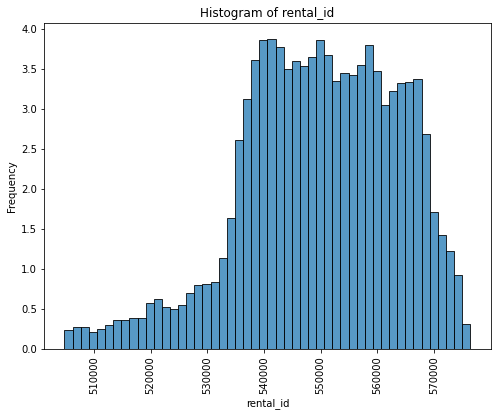

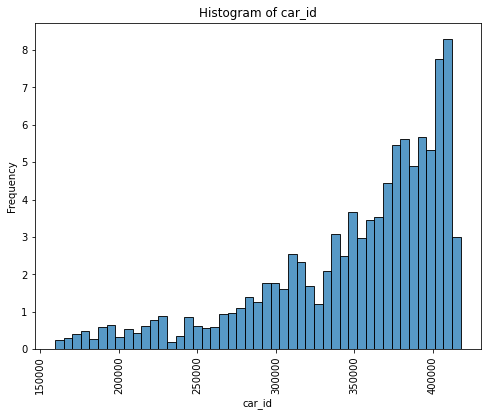

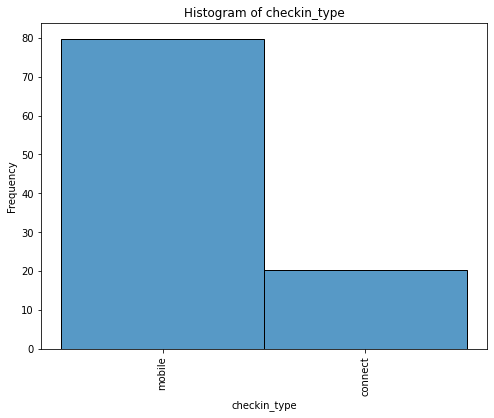

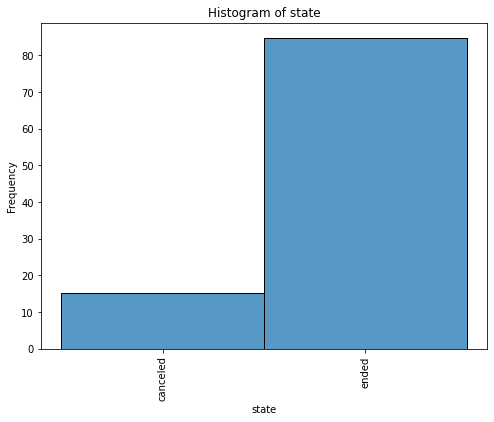

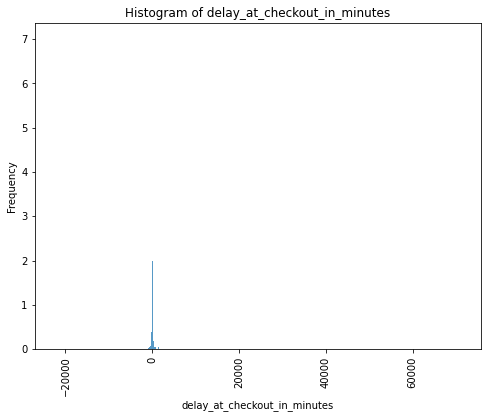

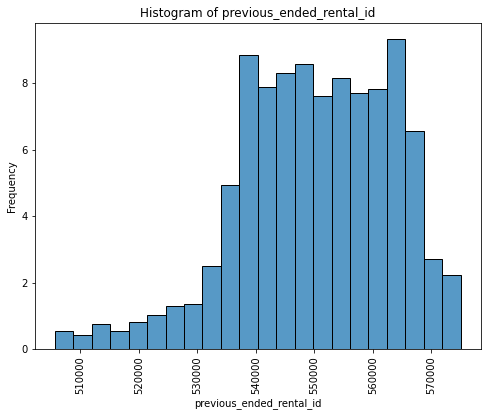

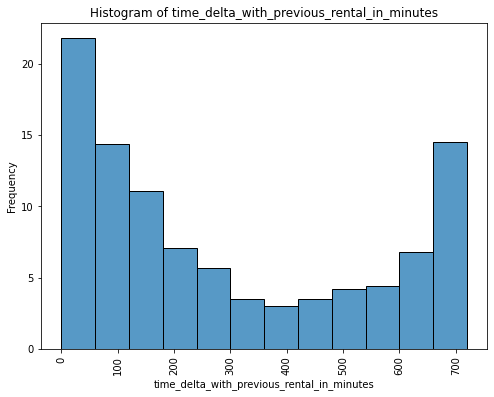

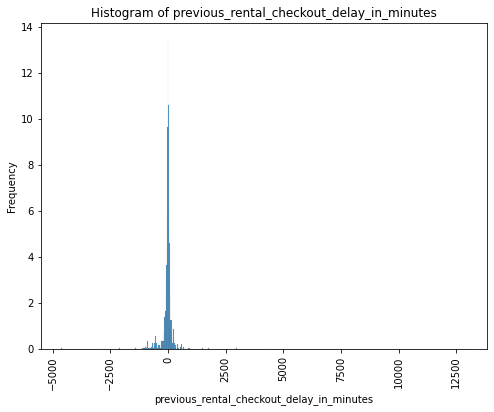

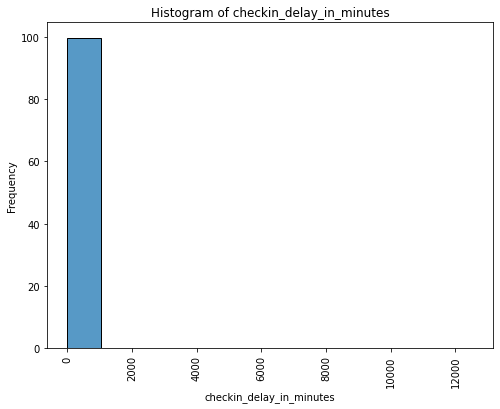

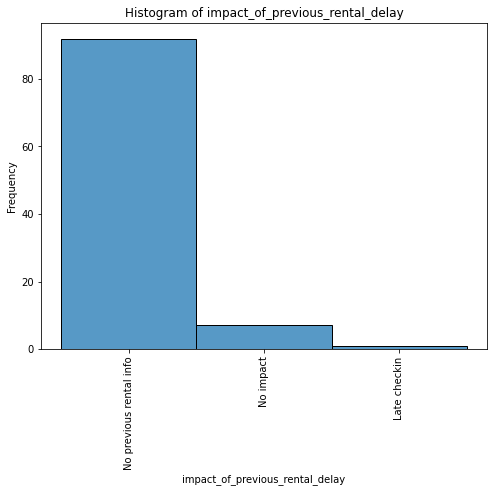

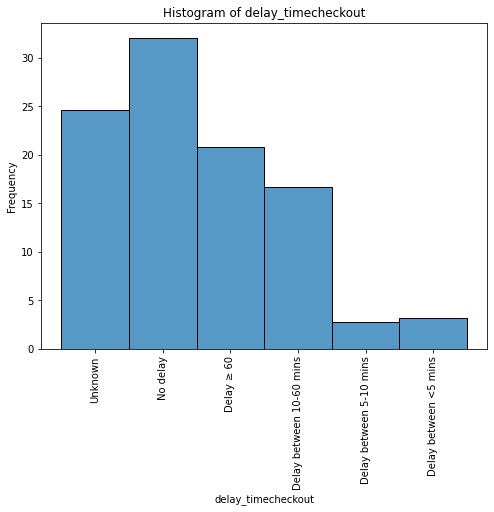

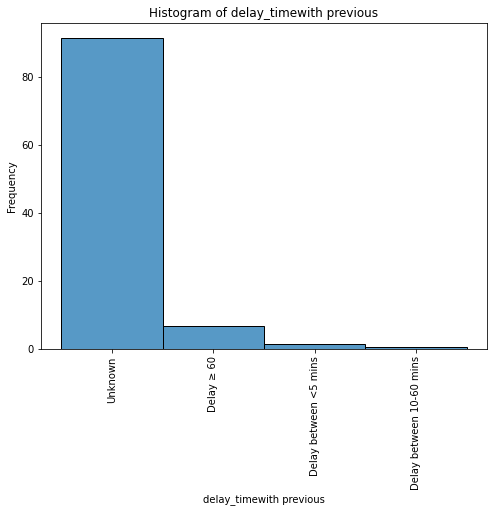

In [13]:
for column in df_delay.columns:
    plt.figure(figsize=(8, 6)) 
    sns.histplot(data=df_delay, x=column, stat = 'percent')
    plt.title(f'Histogram of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Frequency') 
    plt.xticks(rotation=90)
    plt.show()  

In [14]:
fig = px.histogram(df_delay , x='delay_timewith previous',
             color='state',  histnorm = 'percent')
fig.show()

In [15]:
fig = px.histogram(df_delay, x='delay_timewith previous', color= 'checkin_type',
           facet_col= 'state', histnorm = 'percent')
fig.show()

In [16]:
fig = px.histogram(df_delay, x='state', color='delay_timewith previous',
           facet_col= 'checkin_type', histnorm = 'percent')
fig.show()

In [17]:
rows_exceeding_one_day_count = (df_delay['delay_at_checkout_in_minutes'] > 1440).sum()

print("Number of rows with more than 1 day delay:", rows_exceeding_one_day_count)

Number of rows with more than 1 day delay: 188


In [18]:
df_delay["delay_timecheckout"].value_counts()

delay_timecheckout
No delay                    6820
Unknown                     5236
Delay ≥ 60                  4428
Delay between 10-60 mins    3552
Delay between <5 mins        686
Delay between 5-10 mins      588
Name: count, dtype: int64

In [19]:
# Filter rows for canceled rentals
canceled_rentals = df_delay[df_delay['state'] == 'canceled']

# Count the occurrences of each category in the 'delay_time' column for canceled rentals
canceled_delay_counts = canceled_rentals['delay_timecheckout'].value_counts()

# Print the counts
print("Number of canceled rentals by delay of checkout:")
print(canceled_delay_counts)

Number of canceled rentals by delay of checkout:
delay_timecheckout
Unknown     3264
No delay       1
Name: count, dtype: int64


Number of canceled rentals by delay time category:
delay_timecheckout
No delay                    6820
Unknown                     5236
Delay ≥ 60                  4428
Delay between 10-60 mins    3552
Delay between <5 mins        686
Delay between 5-10 mins      588
Name: count, dtype: int64


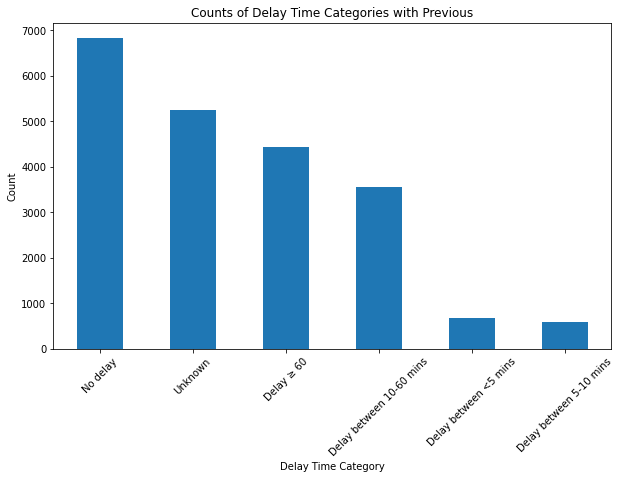

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the column 'delay_time' with previous
delay_time_counts = df_delay['delay_timecheckout'].value_counts()
delay_time_percentages = delay_time_counts /delay_time_counts.sum() * 100
print("Number of canceled rentals by delay time category:")
print(delay_time_counts)

# Create a bar plot
plt.figure(figsize=(10, 6))
delay_time_counts.plot(kind='bar')
plt.xlabel('Delay Time Category')
plt.ylabel('Count')
plt.title('Counts of Delay Time Categories with Previous')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


Number of canceled rentals by delay time category:
delay_timewith previous
Unknown                     3036
Delay ≥ 60                   186
Delay between <5 mins         35
Delay between 10-60 mins       8
Name: count, dtype: int64


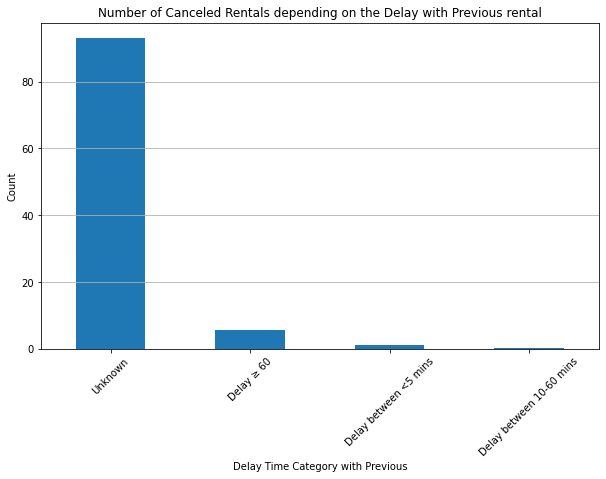

In [21]:
# Filter rows for canceled rentals
canceled_rentals = df_delay[df_delay['state'] == 'canceled']

# Count the occurrences of each category in the 'delay_time' column for canceled rentals
canceled_delay_counts = canceled_rentals['delay_timewith previous'].value_counts()
canceled_delay_percentages = canceled_delay_counts / canceled_delay_counts.sum() * 100

# Print the counts
print("Number of canceled rentals by delay time category:")
print(canceled_delay_counts)

# Plot the counts of canceled rentals by delay time category
plt.figure(figsize=(10, 6))
canceled_delay_percentages.plot(kind='bar')
plt.xlabel('Delay Time Category with Previous')
plt.ylabel('Count')
plt.title('Number of Canceled Rentals depending on the Delay with Previous rental')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()

In [22]:
#Number of cancelled demands
mask1 = df_delay["state"] == 'canceled'
cancel = mask1.sum()
median_rentalduration = 4*60 #use of 4 hours is estimated for all cancelled rides
rent_permin = 121   #median rental price 121$ per min
print ('Total money lost due to canceled rides in this dataset:')
print(round(cancel*median_rentalduration*rent_permin,1), 'dollars')

Total money lost due to canceled rides in this dataset:
94815600 dollars


In [23]:
# Calculation of the associated lost due to the delays
mask = df_delay ['delay_at_checkout_in_minutes'] > 0.0
rent_permin = 121 / 24 / 60 #median rental price 121 per day
tot_late_mins = df_delay.loc[mask,'delay_at_checkout_in_minutes'].sum()
earn_late = rent_permin * tot_late_mins
print(f'Total amount of money earned from late arrivals: {round(earn_late,1)} dollars')

count_late = mask.sum()
median_rentalduration = 4 * 60.  #use of 4 hours is estimated for all cancelled rides
risk_late =count_late * rent_permin * median_rentalduration
print('Total money risked due to late arrivals:')
print(round(risk_late,1), ' dollars' )
print(round(risk_late/earn_late*100.,1), ' percent')

Total amount of money earned from late arrivals: 159455.1 dollars
Total money risked due to late arrivals:
189647.3  dollars
118.9  percent


In [24]:
threshold = np.arange(0, 60*24, 2.5)  # A threshold sampled at each 5 mins for a day
rent_permin = 121. / 24. / 60.  # median rental price 121 per min
rental_duration = 4 * 60.  # use of 4 hours is estimated for all cancelled rides
#col_ = 'delay_at_checkout_in_minutes'
risk_percentage= []
for val_delay in threshold:
    mask_0 = df_delay['delay_at_checkout_in_minutes']> val_delay
    tot_late_mins = df_delay.loc[mask_0, 'delay_at_checkout_in_minutes'].sum()
    earn_late = rent_permin * tot_late_mins
    count_late =mask_0.sum()
    risk_late = count_late * rent_permin * rental_duration
    risk_percentage.append(risk_late/earn_late*100.)#in percentage

fig = px.line(x=threshold,y=risk_percentage, 
              title="Fig -Threshold time to disable car listing versus risk of money losing")
fig.update_layout(xaxis_title = 'Threshold in minutes', yaxis_title = 'Risk of losing money')
fig.show()